In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
matplotlib.__version__

NameError: name 'matplotlib' is not defined

In [1]:
data = pd.read_csv('techSalaries2017.csv')
print(data.shape)

data.head()

NameError: name 'pd' is not defined

## Data Preprocessing

In [350]:
data['Education'].isna().value_counts()

True     32272
False    30370
Name: Education, dtype: int64

In [351]:
data = data[~(data['Education'].isna()==True)]
data.shape

(30370, 27)

In [352]:
X = data.iloc[:,7:20] #ignore variable 1 to 7
X = pd.concat([X, data.iloc[:,22:27].reindex(X.index)], axis=1)
X = pd.concat([X, data.iloc[:,3].reindex(X.index)], axis=1)
X = X.dropna()

y = X["totalyearlycompensation"]
X = X.drop(columns = "totalyearlycompensation")
X = pd.concat([X, pd.get_dummies(X['gender']).reindex(X.index)], axis=1)
X = X.drop(columns = 'gender')
df = pd.concat([X, y.reindex(X.index)], axis=1)
print(X.shape, y.shape)

(27766, 20) (27766,)


## Question 1

Using multiple linear regression: What is the best predictor of total annual
compensation, how much variance is explained by this predictor vs. the full multiple
regression model?

In [353]:
r2_single = pd.Series(dtype = 'float64')

for (Name, col) in X.items():
    model = LinearRegression()
    model.fit(col.values.reshape(-1,1), y)
    r2_single[Name] = model.score(col.values.reshape(-1,1), y)
    
r2_single.sort_values(ascending = False, inplace = True)
r2_single

yearsofexperience    0.161229
SAT                  0.115720
GPA                  0.097223
Age                  0.062144
Bachelors_Degree     0.029756
yearsatcompany       0.024605
Doctorate_Degree     0.023700
Masters_Degree       0.011689
Race_Asian           0.004533
Female               0.001636
Male                 0.001326
Race_Black           0.000724
Race_Hispanic        0.000326
Other                0.000285
Highschool           0.000259
Race_White           0.000112
Height               0.000070
Zodiac               0.000060
Some_College         0.000039
Race_Two_Or_More     0.000009
dtype: float64

All Feature Regression R-squared 0.2766767567782197


Text(0.5, 1.0, 'All Feature Regression R^2 = 0.277')

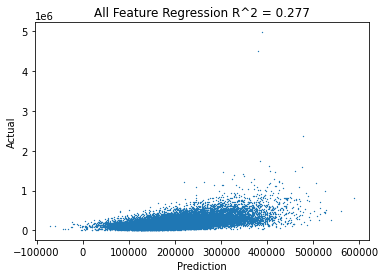

In [354]:
model  = LinearRegression().fit(X,y)
r2_all = model.score(X,y)
print("All Feature Regression R-squared",r2_all)

yHat = model.predict(X)
plt.plot(yHat,y,'x',markersize=.75)

plt.xlabel('Prediction') 
plt.ylabel('Actual')  
plt.title('All Feature Regression R^2 = {:.3f}'.format(r2_all))

In [355]:
train_X, test_X , train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=0)

In [356]:
r2_test = pd.Series(dtype = 'float64')

for (Name, colData) in train_X.items():
    model = LinearRegression()
    model.fit(colData.values.reshape(-1,1), train_y)
    r2_test[Name] = model.score(test_X[Name].values.reshape(-1,1), test_y)
    
r2_test.sort_values(ascending=False)

yearsofexperience    0.161641
SAT                  0.115662
GPA                  0.096742
Age                  0.062909
Bachelors_Degree     0.029518
yearsatcompany       0.027333
Doctorate_Degree     0.015772
Masters_Degree       0.013200
Race_Asian           0.004178
Female               0.001932
Male                 0.001617
Race_Black           0.000565
Highschool           0.000275
Race_Hispanic        0.000242
Race_White           0.000141
Zodiac               0.000069
Other                0.000032
Height              -0.000040
Race_Two_Or_More    -0.000063
Some_College        -0.000308
dtype: float64

All Feature Regression R-squared for test set 0.2662883995801397


Text(0.5, 1.0, 'All Feature Regression R^2 (Split) = 0.266')

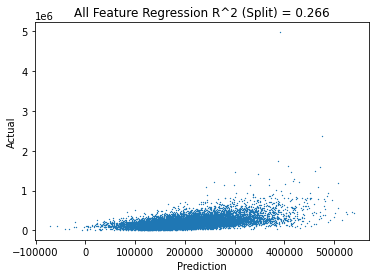

In [357]:
model  = LinearRegression().fit(train_X, train_y)
r2_alltest = model.score(test_X, test_y)
print("All Feature Regression R-squared for test set",r2_alltest)

yHat_split = model.predict(test_X)
plt.plot(yHat_split, test_y, 'x', markersize=.75)

plt.xlabel('Prediction') 
plt.ylabel('Actual')  
plt.title('All Feature Regression R^2 (Split) = {:.3f}'.format(r2_alltest))

## Question 2

Using ridge regression to do the same as in 1): How does the model change or improve compared to OLS? What is the optimal lambda?

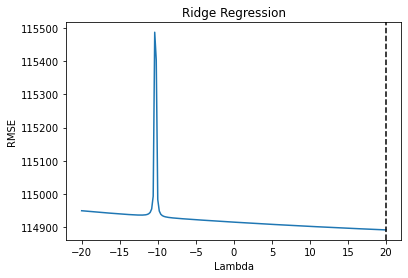

Optimal lambda: 20.0


In [358]:
lambdas = np.linspace(-20,20,201)

cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]
for ii in range(len(lambdas)):
    ridge = Ridge(alpha=lambdas[ii]).fit(train_X, train_y)
    cont[ii,0] = lambdas[ii]
    error = metrics.mean_squared_error(test_y,ridge.predict(test_X),squared=False)
    cont[ii,1] = error
    
opt_ridge = lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]

plt.plot(cont[:,0],cont[:,1])
plt.axvline(x=opt_ridge, linestyle='--', color='black', label='optimal lambda')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge Regression')
plt.show()
print('Optimal lambda:',opt_ridge)

In [359]:
ridgeR2 = pd.Series(dtype = 'float64')
for (Name,colData) in train_X.items():
    ridgeModel = Ridge(alpha=opt_ridge)
    ridgeModel.fit(colData.values.reshape(-1,1), train_y)
    ridgeR2[Name] = ridgeModel.score(test_X[Name].values.reshape(-1,1), test_y)
    
ridgeR2.sort_values(ascending=False)

yearsofexperience    0.161641
SAT                  0.115662
GPA                  0.096659
Age                  0.062909
Bachelors_Degree     0.029514
yearsatcompany       0.027332
Doctorate_Degree     0.016070
Masters_Degree       0.013179
Race_Asian           0.004181
Female               0.001925
Male                 0.001610
Race_Black           0.000575
Highschool           0.000248
Race_Hispanic        0.000233
Race_White           0.000140
Other                0.000105
Zodiac               0.000069
Height              -0.000040
Race_Two_Or_More    -0.000060
Some_College        -0.000270
dtype: float64

All Feature Regression R-squared for test set 0.2665877304101738


Text(0.5, 1.0, 'All Feature Regression R^2 (Ridge) = 0.267')

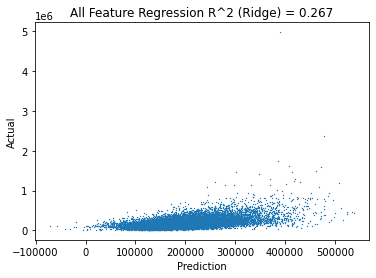

In [360]:
model_ridge = Ridge(alpha=opt_ridge).fit(train_X, train_y)
r2_allridge = model_ridge.score(test_X, test_y)
print("All Feature Regression R-squared for test set",r2_allridge)

yHat_ridge = model_ridge.predict(test_X)
plt.plot(yHat_ridge, test_y, 'x', markersize=.75)
plt.xlabel('Prediction') 
plt.ylabel('Actual')  
plt.title('All Feature Regression R^2 (Ridge) = {:.3f}'.format(r2_allridge))

## Question 3

Using Lasso regression to do the same as in 1): How does the model change now? How many of the predictor betas are shrunk to exactly 0? What is the optimal lambda now?

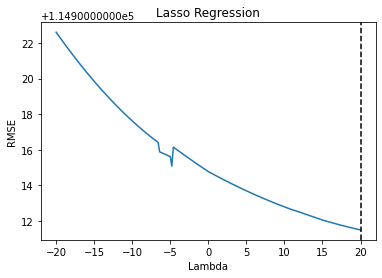

Optimal lambda: 20.0


In [361]:
import warnings
warnings.filterwarnings('ignore') 

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

lambdas = np.linspace(-20,20,201)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]

for ii in range(len(lambdas)):
    lasso = Lasso(alpha=lambdas[ii]).fit(X_train, y_train)
    cont[ii,0] = lambdas[ii]
    error = metrics.mean_squared_error(y_test,lasso.predict(X_test),squared=False)
    cont[ii,1] = error

opt_lasso = lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]

plt.plot(cont[:,0],cont[:,1])
plt.axvline(x=opt_lasso, linestyle='--', color='black', label='optimal lambda')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso Regression')
plt.show()
print('Optimal lambda:', opt_lasso)

In [362]:
LassoR2 = pd.Series(dtype = 'float64')

for (Name,colData) in X_train.items():
    lassoModel = Lasso(alpha=opt_lasso)
    lassoModel.fit(colData.values.reshape(-1,1), y_train)
    LassoR2[Name] = lassoModel.score(X_test[Name].values.reshape(-1,1), y_test)

LassoR2.sort_values(ascending=False)

yearsofexperience    0.161641
SAT                  0.115662
GPA                  0.096736
Age                  0.062909
Bachelors_Degree     0.029517
yearsatcompany       0.027330
Doctorate_Degree     0.015817
Masters_Degree       0.013189
Race_Asian           0.004180
Female               0.001924
Male                 0.001608
Race_Black           0.000572
Highschool           0.000222
Race_Hispanic        0.000199
Race_White           0.000137
Other                0.000071
Zodiac               0.000068
Height              -0.000039
Race_Two_Or_More    -0.000042
Some_College        -0.000236
dtype: float64

Index(['yearsofexperience', 'yearsatcompany', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'Age', 'Height', 'Zodiac', 'SAT', 'GPA', 'Female',
       'Male', 'Other'],
      dtype='object')
[ 9.08648700e+03 -3.07204813e+03  7.72321740e+03 -1.52394548e+04
  8.69247621e+04 -1.84799980e+04 -3.04018478e+04 -1.13977138e+04
 -7.44367744e+03  3.52094377e+03 -1.32341219e+04 -3.43641729e+03
 -7.62247925e+01 -1.28305039e+02  2.87614084e+02  2.99868729e+02
  4.80929602e+03 -6.78769904e+02  0.00000000e+00  2.97363432e+04]

All Feature Regression R-squared for test set 0.26633029352944815


Text(0.5, 1.0, 'All Feature Regression R^2 (Lasso) = 0.266')

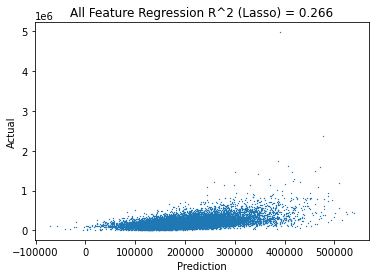

In [363]:
model_lasso = Lasso(alpha=opt_lasso).fit(X_train, y_train)
r2_alllasso = model_lasso.score(X_test, y_test)
print(X_train.columns)
print(model_lasso.coef_)
print()
print("All Feature Regression R-squared for test set",r2_alllasso)

yHat_lasso = model_lasso.predict(X_test)
plt.plot(yHat_lasso, y_test, 'x', markersize=.75)
plt.xlabel('Prediction') 
plt.ylabel('Actual')  
plt.title('All Feature Regression R^2 (Lasso) = {:.3f}'.format(r2_alllasso))

## Question 4

There is controversy as to the existence of a male/female gender pay gap in tech job compensation. Build a logistic regression model (with gender as the outcome variable) to see if there is an appreciable beta associated with total annual compensation with and without controlling for other factors.

In [375]:
df_gender = df[df['Other'] == 0]

X_gender = df_gender.drop(['Female', 'Male', 'Other'], axis = 1, inplace = False)
y_gender = df_gender['Female']

Xgen_train, Xgen_test, ygen_train, ygen_test = train_test_split(X_gender, y_gender, test_size = 0.5, random_state = 0)

logreg = LogisticRegression(solver='newton-cg', class_weight='balanced')
logreg.fit(Xgen_train, ygen_train)
print(Xgen_train.columns)
print(logreg.coef_)
print()
ygen_pred = logreg.predict(Xgen_test)
logreg.score(Xgen_test, ygen_test)

Index(['yearsofexperience', 'yearsatcompany', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'Age', 'Height', 'Zodiac', 'SAT', 'GPA', 'paylevel'],
      dtype='object')
[[-2.85997607e-02 -3.31015564e-03 -5.57029294e-01 -5.64049901e-01
  -8.07905795e-01 -1.79798084e+00 -9.03298097e-01  7.58753200e-02
   1.15551971e-01  1.86868140e-01  5.67980660e-01 -2.97754796e-02
  -9.86329754e-04  9.74030273e-03 -1.73700534e-03  1.51574910e-04
  -1.78234032e-02 -3.35060462e-02]]



0.5035882566147155

In [365]:
unique, counts = np.unique(ygen_pred, return_counts=True)
print(unique, counts)

[0 1] [6283 7512]


In [366]:
Xnew_gen = df_gender["totalyearlycompensation"]

Xngen_train, Xngen_test, ygen_train, ygen_test = train_test_split(Xnew_gen, y_gender, test_size = 0.5, random_state = 0)

lognew = LogisticRegression(solver='newton-cg', class_weight='balanced')
lognew.fit(Xngen_train.values.reshape(-1, 1), ygen_train)
print(lognew.coef_)
print()
ygen_pred = lognew.predict(Xngen_test.values.reshape(-1, 1))
lognew.score(Xngen_test.values.reshape(-1, 1), ygen_test)

[[-1.01769401e-06]]



0.46850308082638636

In [367]:
unique, counts = np.unique(ygen_pred, return_counts=True)
print(unique, counts)

[0 1] [5853 7942]


## Question 5

Build a logistic regression model to see if you can predict high and low pay from years of relevant experience, age, height, SAT score and GPA, respectively.

In [368]:
med = df['totalyearlycompensation'].median()
df['paylevel'] = np.where(df['totalyearlycompensation'] > med, 1, 0)
df.drop(['totalyearlycompensation'], axis = 1, inplace = True)

X_log = df.drop(['paylevel'], axis = 1, inplace = False)
y_log = df['paylevel']
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_log, y_log, test_size = 0.2, random_state = 0)

variable = ['yearsofexperience', 'Age', 'Height', 'SAT', 'GPA']
for v in variable:
    log = LogisticRegression().fit(Xl_train[v].values.reshape(-1, 1), yl_train)
    y_pred = log.predict(Xl_test[v].values.reshape(-1, 1))
    print(f'Accuracy for {v}: {log.score(Xl_test[v].values.reshape(-1, 1), yl_test)}')

Accuracy for yearsofexperience: 0.6508822470291682
Accuracy for Age: 0.5729204177169608
Accuracy for Height: 0.518545192653943
Accuracy for SAT: 0.6029888368743248
Accuracy for GPA: 0.5941663665826431


## Extra Credit 1

Is salary, height or age normally distributed? Does this surprise you? Why or why not?

Text(0.5, 1.0, 'Age')

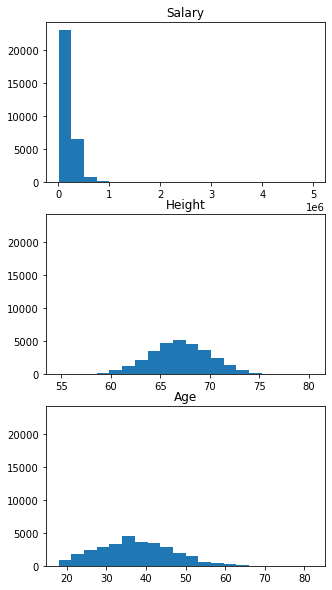

In [369]:
fig, (axs0, axs1, axs2) = plt.subplots(3, 1, sharey=True, figsize=(5,10))

salary = data["totalyearlycompensation"]
height = data["Height"]
age = data["Age"]

axs0.hist(salary, bins=20)
axs0.set_title("Salary")

axs1.hist(height, bins=20)
axs1.set_title("Height")
    
axs2.hist(age, bins=20)
axs2.set_title("Age")

## Extra Credit 2

Tell us something interesting about this dataset that is not already covered by the questions above and that is not obvious.

In [383]:
data['company'].value_counts()

Amazon            3665
Microsoft         2310
Google            1917
Facebook          1431
Apple              915
                  ... 
BazaarVoice          1
zoominfo             1
Pagerduty            1
beyond limits        1
Coupa software       1
Name: company, Length: 1379, dtype: int64

In [371]:
data['title'].value_counts()

Software Engineer               19216
Product Manager                  2197
Software Engineering Manager     1526
Data Scientist                   1410
Hardware Engineer                1282
Technical Program Manager         839
Product Designer                  781
Management Consultant             601
Solution Architect                549
Business Analyst                  521
Marketing                         423
Mechanical Engineer               320
Sales                             256
Recruiter                         250
Human Resources                   199
Name: title, dtype: int64

In [372]:
data['location'].value_counts()

Seattle, WA                  3676
San Francisco, CA            2682
New York, NY                 2167
Redmond, WA                  1105
San Jose, CA                 1031
                             ... 
Florianopolis, SC, Brazil       1
Fulton, MD                      1
Moscow Mills, MO                1
Louisville, CO                  1
Pasir Ris, SG, Singapore        1
Name: location, Length: 843, dtype: int64

In [373]:
data['gender'].value_counts()

Male      22679
Female     4910
Other       177
Name: gender, dtype: int64